In [1]:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [1]:
from fastcore.all import *
from fastai.vision.all import *

In [2]:
path = Path('train')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize((512,512), method='squish')],
    batch_tfms=aug_transforms(size=(256,256))
).dataloaders(path)

learn = vision_learner(dls, models.resnet101).load('aircraft-classification-short.resnet101.colab32(8.7%)')

/opt/homebrew/Caskroom/miniforge/base/envs/apple-m2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/apple-m2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


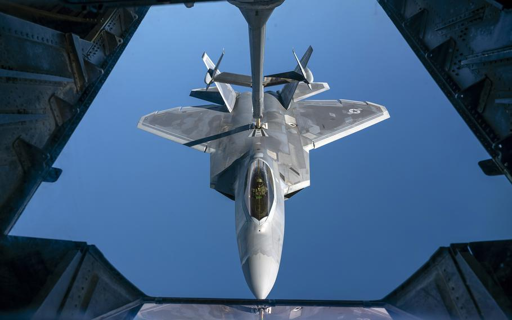

In [3]:
filename = 'test/test04.jpeg' 
Image.open(filename).to_thumb(512,512)

In [4]:
item,_,probs = learn.predict(PILImage.create(filename))
probability = str(format(reduce(max, probs) * 100, ".4f")) + '% probability'
print(f"Aircraft type: {item} ({probability})")

Aircraft type: F-22 Raptor (99.5150% probability)


In [5]:
aircraft_file = 'aircraft-short.txt'

with open(aircraft_file) as file:
    while (line := file.readline().rstrip()):
        image_path = 'verify/' + line + '.jpg'
        item,_,probs = learn.predict(PILImage.create(image_path))
        answer = reduce(max, probs)
        probability = str(format(answer * 100, ".4f"))
        print(line + f"... looks like {item} ({probability})%")
        

F-15 Eagle... looks like F-15 Eagle (99.9999)%


F-16 Falcon... looks like F-16 Falcon (100.0000)%


F-18 Hornet... looks like F-18 Hornet (99.9998)%


F-22 Raptor... looks like F-22 Raptor (99.9998)%


F-35 Lightning... looks like F-35 Lightning (100.0000)%


B-1 Lancer... looks like B-1 Lancer (100.0000)%


B-2 Spirit... looks like B-2 Spirit (99.9997)%


B-52 Stratofortress... looks like B-52 Stratofortress (100.0000)%


A-10 Warthog... looks like A-10 Warthog (100.0000)%


Mig-21 Fishbed... looks like Mig-21 Fishbed (100.0000)%


Mig-25 Foxbat... looks like Mig-25 Foxbat (100.0000)%


Mig-29 Fulcrum... looks like Mig-29 Fulcrum (99.9999)%


Su-25 Frogfoot... looks like Su-25 Frogfoot (100.0000)%


Su-27 Flanker... looks like Su-27 Flanker (100.0000)%


SU-34 Fullback... looks like SU-34 Fullback (100.0000)%


Su-57 Felon... looks like Su-57 Felon (100.0000)%


Shenyang J-15... looks like Shenyang J-15 (99.9996)%


Chengdu J-20... looks like Chengdu J-20 (99.9997)%


Xian H-20... looks like Xian H-20 (100.0000)%


Xian JH-7... looks like Xian JH-7 (100.0000)%
